<a href="https://colab.research.google.com/github/GabrielMedeiros32/Bootcamp_Data_Science/blob/main/M%C3%B3dulos/BootcampM%C3%B3dulo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Módulo 2**

##**Aula 1**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
from matplotlib.lines import Line2D
from io import StringIO
import seaborn as sns
import datetime

In [2]:
dados = pd.read_csv("https://raw.githubusercontent.com/GabrielMedeiros32/Bootcamp_Data_Science/main/Dados/A151346189_28_143_208.csv",
                    encoding="ISO-8859-1", 
                    skiprows = 3, sep=";", skipfooter=12,
                    thousands=".", decimal=",")

dados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,9.291297e+08
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,-,4.206680e+08
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1.771655e+09
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2755620.24,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3020718.84

In [3]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")

In [4]:
usaveis = dados[colunas_usaveis]

In [5]:
usaveis = usaveis.set_index("Unidade da Federação")

In [6]:
usaveis = usaveis.drop("Total", axis=1)

In [7]:
usaveis["Total"] = usaveis.sum(axis=1) # [0,1,2] ["SP"]

In [8]:
ordenado_por_total = usaveis.sort_values("Total", ascending=False)
ordenado_por_total.index = ordenado_por_total.index.str[3:]
ordenado_por_total = ordenado_por_total.drop("Total", axis=1)


In [9]:
colunas_interessadas = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessadas]

In [10]:
ordenado_por_total = ordenado_por_total / 1000000
mes_mais_recente = ordenado_por_total.columns[-1]
mes_mais_recente

'2020/Jul'

In [11]:
gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]
gastos_do_mais_recente.head()

Unidade da Federação
São Paulo            366.721244
Minas Gerais         164.891824
Paraná               109.658360
Rio Grande do Sul    100.531036
Rio de Janeiro        98.722688
Name: 2020/Jul, dtype: float64

In [12]:
gastos_do_mais_recente = gastos_do_mais_recente.sort_values(ascending=False)
gastos_do_mais_recente.head()

Unidade da Federação
São Paulo            366.721244
Minas Gerais         164.891824
Paraná               109.658360
Rio Grande do Sul    100.531036
Rio de Janeiro        98.722688
Name: 2020/Jul, dtype: float64

In [13]:
gastos_proporcionais = gastos_do_mais_recente / gastos_do_mais_recente.sum()


In [14]:
ibge_estimativa = pd.read_excel("https://github.com/GabrielMedeiros32/Bootcamp_Data_Science/raw/main/Dados/estimativa_dou_2020.xls")
ibge_estimativa.head()

,ESTIMATIVAS DA POPULAÇÃO RESIDENTE NO BRASIL E UNIDADES DA FEDERAÇÃO COM DATA DE REFERÊNCIA EM 1º DE JULHO DE 2020,Unnamed: 1,Unnamed: 2
0,BRASIL E UNIDADES DA FEDERAÇÃO,NaN,POPULAÇÃO ESTIMADA
1,Brasil,NaN,211755692
2,Região Norte,NaN,18672591
3,Rondônia,NaN,1796460
4,Acre,NaN,894470


In [15]:
dados_da_populacao = """Posição	Unidade federativa	População	% da pop. total	País comparável
(habitantes)

1	 São Paulo	46 289 333	21,9%	Flag of Spain.svg Espanha (46 439 864)
2	 Minas Gerais	21 292 666	10,1%	 Sri Lanka (20 675 000)
3	 Rio de Janeiro	17 366 189	8,2%	 Países Baixos (16 922 900)
4	Bahia	14 930 634	7,1%	 Chade (14 037 000)
5	 Paraná	11 516 840	5,4%	 Bolívia (11 410 651)
6	 Rio Grande do Sul	11 422 973	5,4%	 Bélgica (11 250 659)
7	 Pernambuco	9 616 621	4,5%	 Bielorrússia (9 485 300)
8	 Ceará	9 187 103	4,3%	 Emirados Árabes Unidos (9 157 000)
9	Pará	8 690 745	4,1%	 Áustria (8 602 112)
10	 Santa Catarina	7 252 502	3,4%	 Sérvia (7 114 393)
11	 Maranhão	7 114 598	3,4%	 Paraguai (7 003 406)
12	 Goiás	7 113 540	3,4%	 Paraguai (7 003 406)
13	 Amazonas	4 207 714	2,0%	 Líbano (4 168 000)
14	 Espírito Santo	4 064 052	1,9%	 Líbano (4 168 000)
15	 Paraíba	4 039 277	1,9%	 Líbano (4 168 000)
16	 Rio Grande do Norte	3 534 165	1,7%	 Uruguai (3 415 866)
17	 Mato Grosso	3 526 220	1,7%	 Uruguai (3 415 866)
18	 Alagoas	3 351 543	1,6%	 Uruguai (3 415 866)
19	 Piauí	3 281 480	1,6%	 Kuwait (3 268 431)
20	 Distrito Federal	3 055 149	1,4%	 Lituânia (2 900 787)
21	 Mato Grosso do Sul	2 809 394	1,3%	 Jamaica (2 717 991)
22	 Sergipe	2 318 822	1,1%	 Namíbia (2 280 700)
23	 Rondônia	1 796 460	0,8%	 Gabão (1 725 000)
24	 Tocantins	1 590 248	0,7%	 Bahrein (1 359 800)
25	 Acre	894 470	0,4%	 Fiji (859 178)
26	 Amapá	861 773	0,4%	 Fiji (859 178)
27	 Roraima	631 181	0,3%	 Luxemburgo (562 958)"""

# fonte: https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o#cite_note-IBGE_POP-1

In [16]:
dados_da_populacao_io = StringIO(dados_da_populacao)

populacao = pd.read_csv(dados_da_populacao_io, sep="\t")
populacao = populacao.dropna()
populacao["populacao"] = populacao["População"].str.replace(" ", "").astype(int)
populacao["uf"] = populacao["Unidade federativa"]
populacao = populacao[["populacao", "uf"]].set_index("uf")
display(populacao.head())
display(populacao.info())

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840


<class 'pandas.core.frame.DataFrame'>
Index: 27 entries,  São Paulo to  Roraima
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   populacao  27 non-null     int64
dtypes: int64(1)
memory usage: 432.0+ bytes


None

In [17]:
populacao.index = populacao.index.str.strip()
populacao.head()

,populacao
uf,
São Paulo,46289333
Minas Gerais,21292666
Rio de Janeiro,17366189
Bahia,14930634
Paraná,11516840


### **Desafios**

**Desafio 1** - Entre nos dados do wikipedia e Leia a Base de dados direto do wikipedia.

In [18]:
wiki = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o')
wiki_df = pd.DataFrame(wiki[0])
wiki_df

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
3,4,Bahia,14 930 634,"7,1%",Chade (14 037 000)
4,5,Paraná,11 516 840,"5,4%",Bolívia (11 410 651)
5,6,Rio Grande do Sul,11 422 973,"5,4%",Bélgica (11 250 659)
6,7,Pernambuco,9 616 621,"4,5%",Bielorrússia (9 485 300)
7,8,Ceará,9 187 103,"4,3%",Emirados Árabes Unidos (9 157 000)
8,9,Pará,8 690 745,"4,1%",Áustria (8 602 112)
9,10,Santa Catarina,7 252 502,"3,4%",Sérvia (7 114 393)


**Desafio 2** - Neste desafio temos uma série de passos:

*   Padronizar os nomes das colunas
*   Transformar os dados nos tipos corretos
*   Transformar a UF em index *



In [19]:
wiki_df = wiki_df.rename(columns={'% da pop. total':'Porcentagem'})
wiki_df = wiki_df.drop('Posição',axis=1)
wiki_df = wiki_df.set_index('Unidade federativa')
wiki_df

,População,Porcentagem,País comparável (habitantes)
Unidade federativa,,,
São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
Minas Gerais,21 292 666,"10,1%",Sri Lanka (20 675 000)
Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)
Bahia,14 930 634,"7,1%",Chade (14 037 000)
Paraná,11 516 840,"5,4%",Bolívia (11 410 651)
Rio Grande do Sul,11 422 973,"5,4%",Bélgica (11 250 659)
Pernambuco,9 616 621,"4,5%",Bielorrússia (9 485 300)
Ceará,9 187 103,"4,3%",Emirados Árabes Unidos (9 157 000)
Pará,8 690 745,"4,1%",Áustria (8 602 112)


In [20]:
wiki_df['Porcentagem'] = wiki_df.loc[:,'Porcentagem'].str[:-1]
wiki_df['Porcentagem'] = wiki_df['Porcentagem'].str.replace(',','.') 
wiki_df['Porcentagem'] = wiki_df['Porcentagem'].astype(float)
wiki_df

,População,Porcentagem,País comparável (habitantes)
Unidade federativa,,,
São Paulo,46 289 333,21.9,Espanha (46 439 864)
Minas Gerais,21 292 666,10.1,Sri Lanka (20 675 000)
Rio de Janeiro,17 366 189,8.2,Países Baixos (16 922 900)
Bahia,14 930 634,7.1,Chade (14 037 000)
Paraná,11 516 840,5.4,Bolívia (11 410 651)
Rio Grande do Sul,11 422 973,5.4,Bélgica (11 250 659)
Pernambuco,9 616 621,4.5,Bielorrússia (9 485 300)
Ceará,9 187 103,4.3,Emirados Árabes Unidos (9 157 000)
Pará,8 690 745,4.1,Áustria (8 602 112)


In [21]:
wiki_df['População'] = wiki_df['População'].str.replace(' ','')
wiki_df['População'] = wiki_df['População'].astype(int)
wiki_df

,População,Porcentagem,País comparável (habitantes)
Unidade federativa,,,
São Paulo,46289333,21.9,Espanha (46 439 864)
Minas Gerais,21292666,10.1,Sri Lanka (20 675 000)
Rio de Janeiro,17366189,8.2,Países Baixos (16 922 900)
Bahia,14930634,7.1,Chade (14 037 000)
Paraná,11516840,5.4,Bolívia (11 410 651)
Rio Grande do Sul,11422973,5.4,Bélgica (11 250 659)
Pernambuco,9616621,4.5,Bielorrússia (9 485 300)
Ceará,9187103,4.3,Emirados Árabes Unidos (9 157 000)
Pará,8690745,4.1,Áustria (8 602 112)


**Desafio 3** - Buscar na documentação alguns métodos envolvendo strings

https://www.w3schools.com/python/python_ref_string.asp

**Desafio 4** - Desenvolver uma função para a limpeza e tratamento dos dados, retornando duas tabelas "população" e "unida".

In [22]:
#Retirado do Discord do Bootcamp
def tratar_dados(pop, gastos_SUS):
  '''
  Função de tratamento e limpeza do DataFrame contendo dados de estimativa de população,
  retirado da página da Wikipedia, Lista de unidades federativas do Brasil por população.
  (https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o)
  
  Além da limpeza, a função realiza o join à Series contendo dados de população em um determinado
  mês, por Unidade da Federação.

  Parâmetros:
  pop > DataFrame contendo os dados de estimativa de população
  gastos_SUS > Series contendo os dados de gasto do SUS

  Retornos:
  populacao > DataFrame contendo os dados de estimativa de população padronizados
  unida > Join entre populacao e gastos_SUS
  '''

  # Limpando 'pop' e transformando em 'populacao'.
  populacao = pop
  populacao['uf'] = pop['Unidade federativa'].str.strip()
  populacao['populacao'] = pd.to_numeric(pop['População'].str.replace(' ',''))
  populacao = populacao[['uf','populacao']]
  populacao.set_index('uf', inplace=True)

  # Unindo 'populacao' e 'gastos_SUS', resultando 'unida'.
  unida = populacao.join(gastos_SUS)

  return populacao, unida

##**Aula 2**

In [23]:
gastos_e_populacao_mais_recente = populacao.join(gastos_do_mais_recente)
gastos_e_populacao_mais_recente.head()

,populacao,2020/Jul
uf,,
São Paulo,46289333,366.721244
Minas Gerais,21292666,164.891824
Rio de Janeiro,17366189,98.722688
Bahia,14930634,83.992135
Paraná,11516840,109.658360


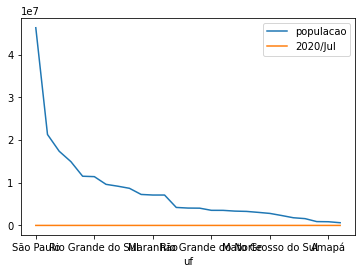

In [24]:
gastos_e_populacao_mais_recente.plot()

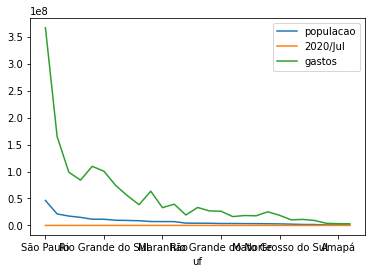

In [25]:
gastos_e_populacao_mais_recente["gastos"] = gastos_e_populacao_mais_recente["2020/Jul"] * 1000000
gastos_e_populacao_mais_recente.plot()

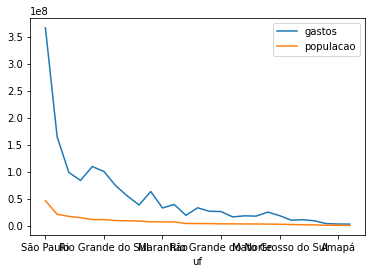

In [26]:
gastos_e_populacao_mais_recente[["gastos", "populacao"]].plot()

In [27]:
gastos_e_populacao_mais_recente.head()

,populacao,2020/Jul,gastos
uf,,,
São Paulo,46289333,366.721244,3.667212e+08
Minas Gerais,21292666,164.891824,1.648918e+08
Rio de Janeiro,17366189,98.722688,9.872269e+07
Bahia,14930634,83.992135,8.399213e+07
Paraná,11516840,109.658360,1.096584e+08


In [28]:
gastos_e_populacao_mais_recente["gasto_por_habitante"] = gastos_e_populacao_mais_recente["gastos"] / gastos_e_populacao_mais_recente["populacao"]
gastos_e_populacao_mais_recente.head()

,populacao,2020/Jul,gastos,gasto_por_habitante
uf,,,,
São Paulo,46289333,366.721244,3.667212e+08,7.922370
Minas Gerais,21292666,164.891824,1.648918e+08,7.744067
Rio de Janeiro,17366189,98.722688,9.872269e+07,5.684764
Bahia,14930634,83.992135,8.399213e+07,5.625490
Paraná,11516840,109.658360,1.096584e+08,9.521567


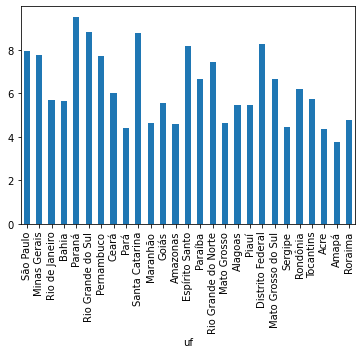

In [29]:
gastos_e_populacao_mais_recente["gasto_por_habitante"].plot(kind='bar')

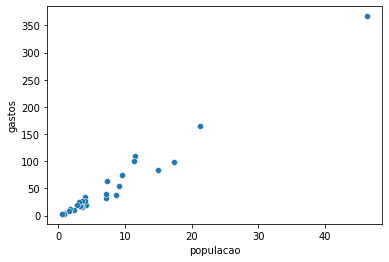

In [30]:
sns.scatterplot(data=gastos_e_populacao_mais_recente / 1000000, x="populacao", y="gastos")

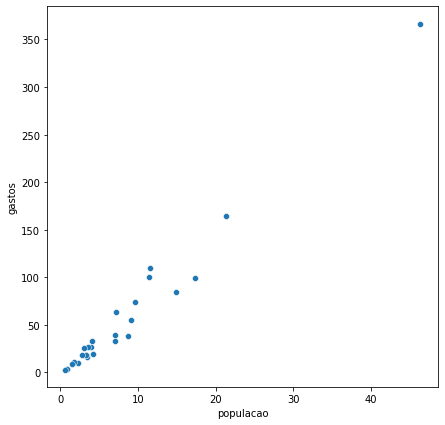

In [31]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_populacao_mais_recente / 1000000, x="populacao", y="gastos")

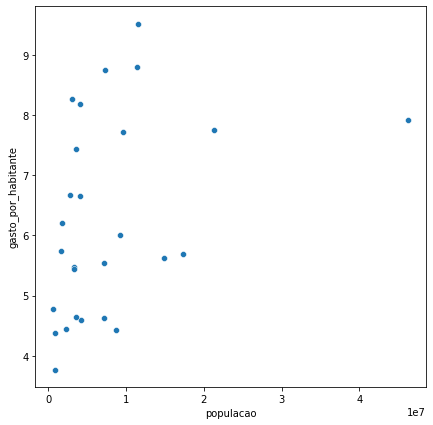

In [32]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=gastos_e_populacao_mais_recente, x="populacao", y="gasto_por_habitante")

###**Desafios**

**Desafio 1** - Ordenar o gráfico e criar uma visualização de gastos por habitantes ordenada.

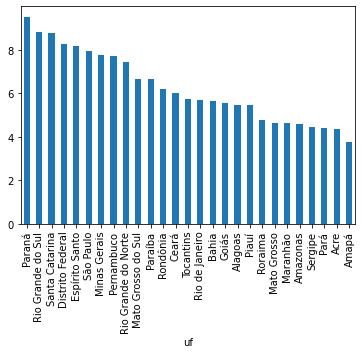

In [33]:
gastos_e_populacao_mais_recente["gasto_por_habitante"].sort_values(ascending=False).plot(kind='bar')

**Desafio 2** - Fazer os mesmos gráficos do final da aula.

Feitos neste notebook

**Desafio 3** - Plotar no mesmos gráficos do final da aula o mês anterior e o mês correto, analisar e compartilhar suas hipóteses.

In [34]:
def insere_gastos_hab(todos_os_gastos: pd.DataFrame, dados: pd.DataFrame, mes: str):
  gastos_do_mes = todos_os_gastos[mes]
  dados[f"gastos_{mes}"] = gastos_do_mes * 1000000
  dados[f"gasto_por_habitante_{mes}"] = dados[f"gastos_{mes}"] / dados["populacao"]

In [35]:
insere_gastos_hab(ordenado_por_total,gastos_e_populacao_mais_recente,ordenado_por_total.columns[-2])
gastos_e_populacao_mais_recente.head()

,populacao,2020/Jul,gastos,gasto_por_habitante,gastos_2020/Jun,gasto_por_habitante_2020/Jun
uf,,,,,,
São Paulo,46289333,366.721244,3.667212e+08,7.922370,3.064255e+08,6.619786
Minas Gerais,21292666,164.891824,1.648918e+08,7.744067,1.396998e+08,6.560933
Rio de Janeiro,17366189,98.722688,9.872269e+07,5.684764,9.150744e+07,5.269288
Bahia,14930634,83.992135,8.399213e+07,5.625490,6.956766e+07,4.659391
Paraná,11516840,109.658360,1.096584e+08,9.521567,9.697729e+07,8.420477


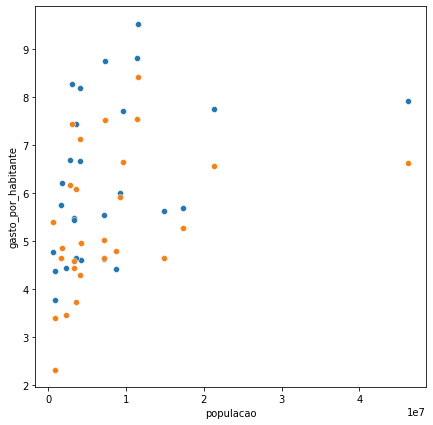

In [36]:
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(data=gastos_e_populacao_mais_recente, x="populacao", y="gasto_por_habitante")
sns.scatterplot(data=gastos_e_populacao_mais_recente, x="populacao", y="gasto_por_habitante_2020/Jun")

**Desafio 04** - Analise os gráficos e tente chegar a hipóteses que explicam o que você está entendendo dos dados. Lembre-se que a conclusão é uma hipótese. E que esses dados serão alterados.

Feito no discord

##**Aula** 3

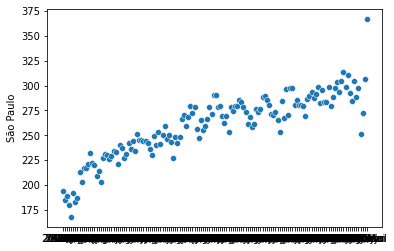

In [37]:
sns.scatterplot(data=ordenado_por_total.T, x=ordenado_por_total.columns, y="São Paulo")

In [38]:
mensal = ordenado_por_total.T
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008/Jul,194.398399,85.360064,58.094242,56.636377,49.872379,47.481695,32.685641,30.789136,30.925391,20.540517,24.002224,15.784899,13.035374,11.386350,12.755414,12.565647,10.249300,11.040108,9.887062,9.163314,9.368859,5.521904,5.445602,3.065279,2.511755,0.996693,1.426659
2008/Ago,184.854516,84.722528,56.982775,56.113055,50.912707,46.931248,35.457039,31.250854,27.851439,20.650731,23.341218,15.195313,12.588596,10.640817,12.872578,13.710858,9.671553,10.549176,9.373432,9.243149,9.352533,5.238398,5.413710,3.231495,2.089107,0.894271,1.475551
2008/Set,188.636360,84.601758,57.549082,55.356224,49.270353,44.883379,33.668261,30.019677,30.362720,20.868444,25.172261,14.951278,12.727433,11.336030,12.558296,13.165106,10.218511,10.899199,9.563581,9.052355,9.363099,5.187912,5.596669,3.117179,2.275709,0.910424,1.651341
2008/Out,179.706467,85.559789,57.121887,53.637713,46.434912,41.920011,30.579748,31.957604,27.657899,20.621423,24.011712,16.072219,12.656039,10.606465,12.768728,15.048607,9.547924,11.715943,9.805243,9.677094,8.618319,4.584069,4.658414,3.068430,1.923887,1.191770,1.866749
2008/Nov,167.990353,78.329947,53.117937,53.699506,39.907348,37.524745,31.049831,25.115485,23.572203,17.094580,21.526304,14.016545,11.456720,10.742812,12.305713,11.343167,9.450010,10.369914,9.483680,7.150346,6.555549,4.096787,5.252452,2.825839,1.756987,1.056219,1.426138


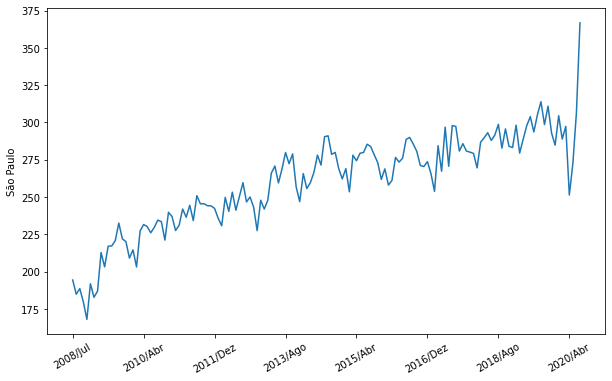

In [39]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y="São Paulo")
plt.xticks(rotation=30)
ax.xaxis.set_major_locator(ticker.AutoLocator())
plt.show()

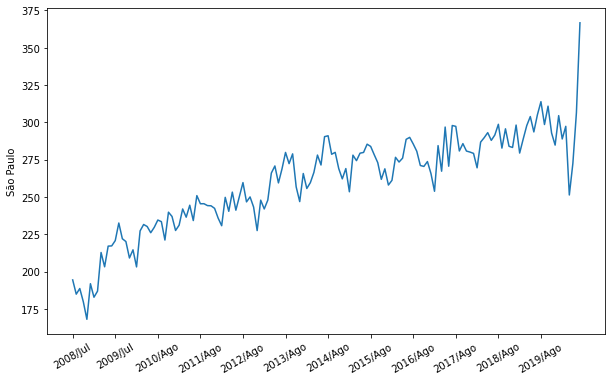

In [40]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y="São Paulo")
plt.xticks(rotation=30)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))
plt.show()

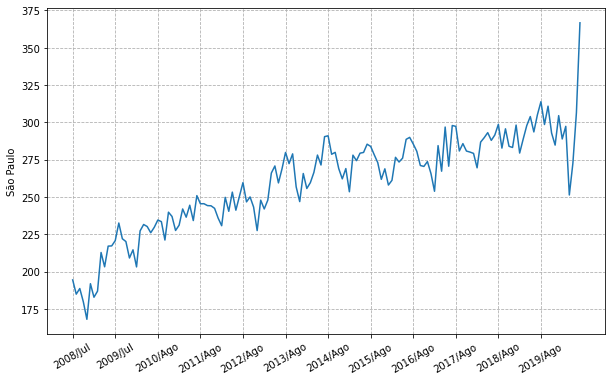

In [41]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y="São Paulo")
plt.xticks(rotation=30)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))
plt.grid(True, linestyle="--")
plt.show()

###**Desafios**

**Desafio 1** - Fazer o scatter plot feito em aula para o seu estado, leia um pouco da documentação sobre este gráfico e teste alguns parâmetros.

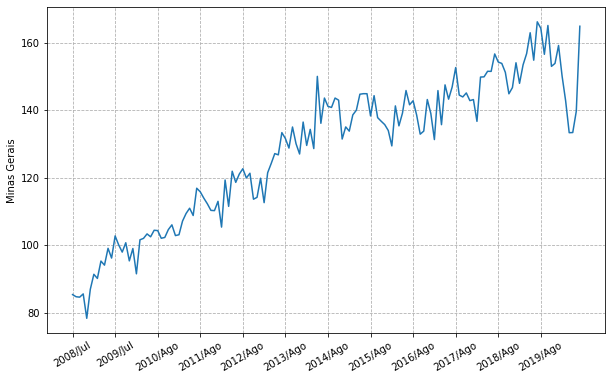

In [42]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y="Minas Gerais")
plt.xticks(rotation=30)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))
plt.grid(True, linestyle="--")
plt.show()

**Desafio 2** - Formatar o eixo y colocando a escala em milhões usando o StrMethodFormatter, colocar um título e colocar o título nos 2 eixos, alterando os tamanhos dos títulos.

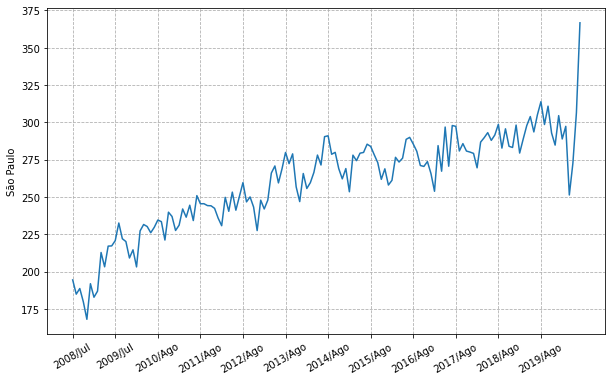

In [43]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y="São Paulo")
plt.xticks(rotation=30)
ax.xaxis.set_major_locator(ticker.IndexLocator(base=12, offset=0))
plt.grid(True, linestyle="--")
plt.show()

##**Aula 4**

In [44]:
meses = {
    "Jan" : 1,
    "Fev" : 2,
    "Mar" : 3,
    "Abr" : 4,
    "Mai" : 5,
    "Jun" : 6,
    "Jul" : 7,
    "Ago" : 8,
    "Set" : 9,
    "Out" : 10,
    "Nov" : 11,
    "Dez" : 12
}

def para_dia(ano_mes: str):
  ano: int = int(ano_mes[:4])
  mes: str = ano_mes[5:]
  mes_numero: int = meses[mes]
  return datetime.date(ano, mes_numero, 1)

mensal.index = mensal.index.map(para_dia)
mensal.head()

Unidade da Federação,São Paulo,Minas Gerais,Paraná,Rio Grande do Sul,Rio de Janeiro,Bahia,Pernambuco,Santa Catarina,Ceará,Goiás,Pará,Maranhão,Espírito Santo,Rio Grande do Norte,Paraíba,Distrito Federal,Mato Grosso do Sul,Piauí,Alagoas,Mato Grosso,Amazonas,Sergipe,Tocantins,Rondônia,Acre,Roraima,Amapá
2008-07-01,194.398399,85.360064,58.094242,56.636377,49.872379,47.481695,32.685641,30.789136,30.925391,20.540517,24.002224,15.784899,13.035374,11.386350,12.755414,12.565647,10.249300,11.040108,9.887062,9.163314,9.368859,5.521904,5.445602,3.065279,2.511755,0.996693,1.426659
2008-08-01,184.854516,84.722528,56.982775,56.113055,50.912707,46.931248,35.457039,31.250854,27.851439,20.650731,23.341218,15.195313,12.588596,10.640817,12.872578,13.710858,9.671553,10.549176,9.373432,9.243149,9.352533,5.238398,5.413710,3.231495,2.089107,0.894271,1.475551
2008-09-01,188.636360,84.601758,57.549082,55.356224,49.270353,44.883379,33.668261,30.019677,30.362720,20.868444,25.172261,14.951278,12.727433,11.336030,12.558296,13.165106,10.218511,10.899199,9.563581,9.052355,9.363099,5.187912,5.596669,3.117179,2.275709,0.910424,1.651341
2008-10-01,179.706467,85.559789,57.121887,53.637713,46.434912,41.920011,30.579748,31.957604,27.657899,20.621423,24.011712,16.072219,12.656039,10.606465,12.768728,15.048607,9.547924,11.715943,9.805243,9.677094,8.618319,4.584069,4.658414,3.068430,1.923887,1.191770,1.866749
2008-11-01,167.990353,78.329947,53.117937,53.699506,39.907348,37.524745,31.049831,25.115485,23.572203,17.094580,21.526304,14.016545,11.456720,10.742812,12.305713,11.343167,9.450010,10.369914,9.483680,7.150346,6.555549,4.096787,5.252452,2.825839,1.756987,1.056219,1.426138


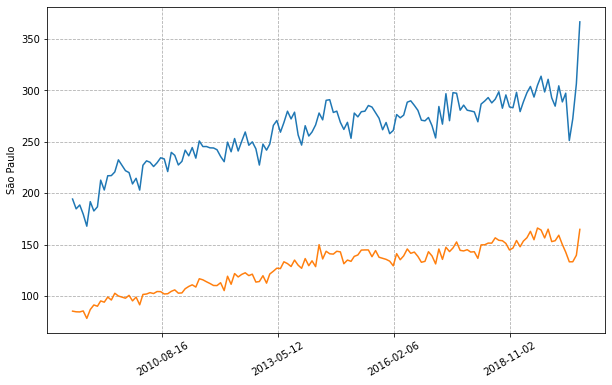

In [45]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal, x=mensal.index, y="São Paulo")
ax = sns.lineplot(data=mensal, x=mensal.index, y="Minas Gerais")
plt.xticks(rotation=30)
ax.xaxis.set_major_locator(ticker.AutoLocator())
plt.grid(True, linestyle="--")
plt.show()

In [46]:
mensal_aberto = mensal.reset_index().melt(id_vars=["index"], value_vars=mensal.columns)
mensal_aberto.columns = ["dia_mes_ano", "uf", "gasto"]
mensal_aberto['dia_mes_ano'] = mensal_aberto['dia_mes_ano'].astype('datetime64')
mensal_aberto.head()

,dia_mes_ano,uf,gasto
0,2008-07-01,São Paulo,194.398399
1,2008-08-01,São Paulo,184.854516
2,2008-09-01,São Paulo,188.636360
3,2008-10-01,São Paulo,179.706467
4,2008-11-01,São Paulo,167.990353


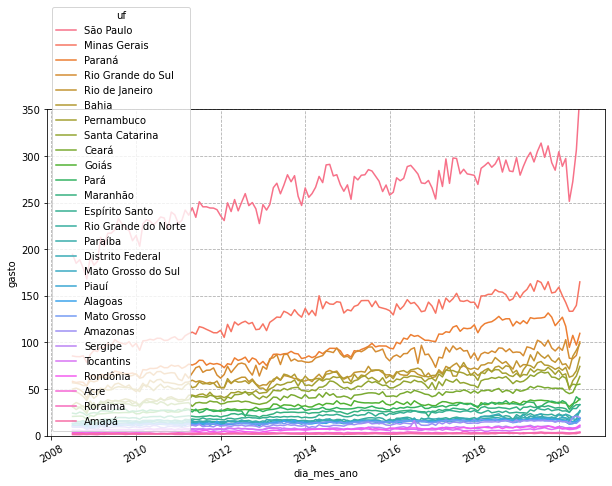

In [47]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto, x="dia_mes_ano", y="gasto", hue="uf")
plt.xticks(rotation=30)
plt.ylim(0, 350)
plt.grid(linestyle="--")
plt.show()

###**Desafios**

**Desafio 1** - Estudar a documentação DateTime do Python, escolha dois métodos para se aprofundar faça alguns testes e compartilhe o conhecimento adquirido com seus colegas no Discord.

Feito em https://docs.python.org/3/library/datetime.html

**Desafio 2** - Aprendemos a usar o Melt para desnormalizar sua base de dados, agora o desafio é realizar o processo contrário, voltar atrás partindo do mensal_aberto chegando no mensal.

In [72]:
mensal_pivot = mensal_aberto[['dia_mes_ano','uf','gasto']].pivot(index = 'dia_mes_ano', columns="uf")["gasto"]
mensal_pivot.head()

uf,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,Mato Grosso,Mato Grosso do Sul,Minas Gerais,Paraná,Paraíba,Pará,Pernambuco,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de Janeiro,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
dia_mes_ano,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-07-01,2.511755,9.887062,1.426659,9.368859,47.481695,30.925391,12.565647,13.035374,20.540517,15.784899,9.163314,10.249300,85.360064,58.094242,12.755414,24.002224,32.685641,11.040108,11.386350,56.636377,49.872379,3.065279,0.996693,30.789136,5.521904,194.398399,5.445602
2008-08-01,2.089107,9.373432,1.475551,9.352533,46.931248,27.851439,13.710858,12.588596,20.650731,15.195313,9.243149,9.671553,84.722528,56.982775,12.872578,23.341218,35.457039,10.549176,10.640817,56.113055,50.912707,3.231495,0.894271,31.250854,5.238398,184.854516,5.413710
2008-09-01,2.275709,9.563581,1.651341,9.363099,44.883379,30.362720,13.165106,12.727433,20.868444,14.951278,9.052355,10.218511,84.601758,57.549082,12.558296,25.172261,33.668261,10.899199,11.336030,55.356224,49.270353,3.117179,0.910424,30.019677,5.187912,188.636360,5.596669
2008-10-01,1.923887,9.805243,1.866749,8.618319,41.920011,27.657899,15.048607,12.656039,20.621423,16.072219,9.677094,9.547924,85.559789,57.121887,12.768728,24.011712,30.579748,11.715943,10.606465,53.637713,46.434912,3.068430,1.191770,31.957604,4.584069,179.706467,4.658414
2008-11-01,1.756987,9.483680,1.426138,6.555549,37.524745,23.572203,11.343167,11.456720,17.094580,14.016545,7.150346,9.450010,78.329947,53.117937,12.305713,21.526304,31.049831,10.369914,10.742812,53.699506,39.907348,2.825839,1.056219,25.115485,4.096787,167.990353,5.252452


**Desafio 3** - Melhorar o gráfico da distribuição do gráfico:

* Escolha apenas alguns estados.
* Mude a palete de cores.
* Posicione a legenda de forma mais adequada.
* Adicione título principal e nos eixos x e y.

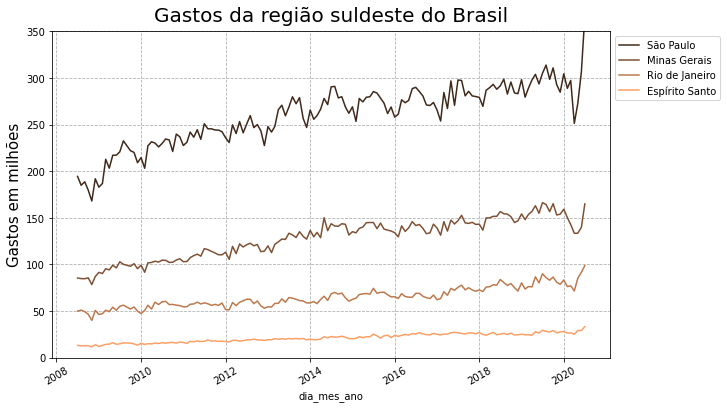

In [86]:
plt.figure(figsize=(10,6))
selecionados = ['Minas Gerais','São Paulo','Rio de Janeiro','Espírito Santo']
ax = sns.lineplot(data=mensal_aberto.query('uf in @selecionados'), x="dia_mes_ano", y="gasto", hue="uf", palette = 'copper')
plt.ylabel("Gastos em milhões", fontsize=15)
plt.title("Gastos da região suldeste do Brasil", fontsize=20, pad=10)
plt.xticks(rotation=30)
plt.ylim(0, 350)
plt.grid(linestyle="--")
plt.legend(bbox_to_anchor=(1,1))
plt.show()

##**Aula 5**

In [48]:
mensal_aberto = mensal.reset_index().melt(id_vars=["index"], value_vars=mensal.columns)
mensal_aberto.columns = ["dia_mes_ano", "uf", "gasto"]
mensal_aberto['dia_mes_ano'] = mensal_aberto['dia_mes_ano'].astype('datetime64')
mensal_aberto.head()

,dia_mes_ano,uf,gasto
0,2008-07-01,São Paulo,194.398399
1,2008-08-01,São Paulo,184.854516
2,2008-09-01,São Paulo,188.636360
3,2008-10-01,São Paulo,179.706467
4,2008-11-01,São Paulo,167.990353


In [49]:
mensal_aberto["mes"] = mensal_aberto["dia_mes_ano"].dt.month
mensal_aberto["ano"] = mensal_aberto["dia_mes_ano"].dt.year
mensal_aberto.head()

,dia_mes_ano,uf,gasto,mes,ano
0,2008-07-01,São Paulo,194.398399,7,2008
1,2008-08-01,São Paulo,184.854516,8,2008
2,2008-09-01,São Paulo,188.636360,9,2008
3,2008-10-01,São Paulo,179.706467,10,2008
4,2008-11-01,São Paulo,167.990353,11,2008


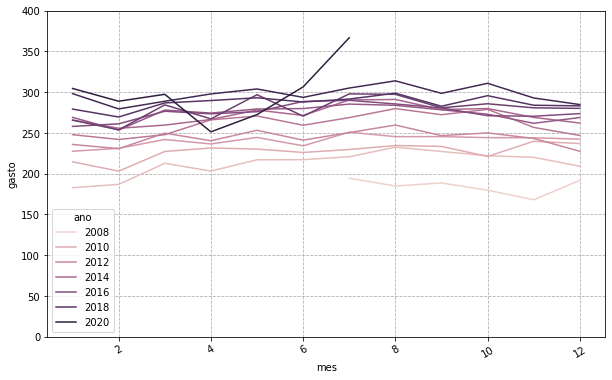

In [50]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto.query("uf=='São Paulo'"), x="mes", y="gasto", hue="ano")
plt.xticks(rotation=30)
plt.ylim(0, 400)
plt.grid(linestyle="--")
plt.show()

In [51]:
dias_por_mes = {
    1 : 31,
    2 : 28,
    3 : 31,
    4 : 30,
    5 : 31,
    6 : 30,
    7 : 31,
    8 : 31,
    9 : 30,
    10 : 31,
    11 : 30,
    12 : 31
}

In [52]:
mensal_aberto['gasto_diario'] = mensal_aberto['gasto'] / mensal_aberto['mes'].map(dias_por_mes)
mensal_aberto.head()

,dia_mes_ano,uf,gasto,mes,ano,gasto_diario
0,2008-07-01,São Paulo,194.398399,7,2008,6.270916
1,2008-08-01,São Paulo,184.854516,8,2008,5.963049
2,2008-09-01,São Paulo,188.636360,9,2008,6.287879
3,2008-10-01,São Paulo,179.706467,10,2008,5.796983
4,2008-11-01,São Paulo,167.990353,11,2008,5.599678


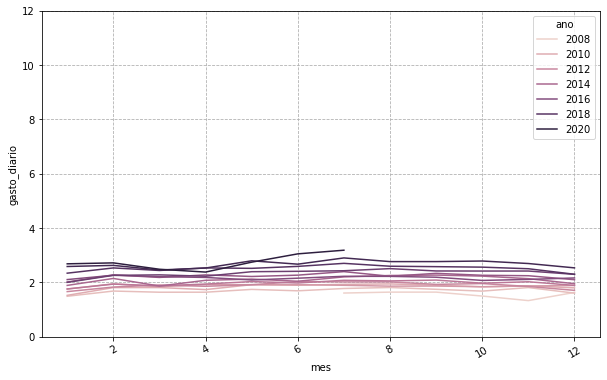

In [53]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto.query("uf=='Rio de Janeiro'"), x="mes", y="gasto_diario", hue="ano")
plt.xticks(rotation=30)
plt.ylim(0, 12)
plt.grid(linestyle="--")
plt.show()

###**Desafios**

**Desafio 1** -  Melhorar o gráfico ano a ano:

Mudar a palete de cor, colocar um título descritivo, adicionar ticks com o nome de cada mês no eixo x.

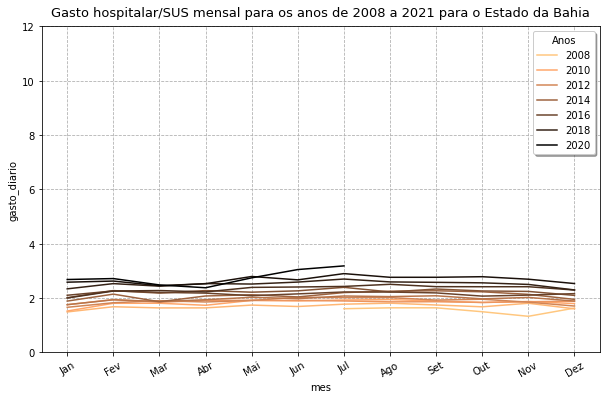

In [98]:
sigla_mes = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto.query("uf=='Rio de Janeiro'"), x="mes", y="gasto_diario", hue="ano",palette='copper_r')
ax.set_title('Gasto hospitalar/SUS mensal para os anos de 2008 a 2021 para o Estado da Bahia', fontsize=13, pad=10)
ax.xaxis.set_major_locator(ticker.FixedLocator(np.arange(1, 13)))
plt.legend(title='Anos', frameon=True, shadow=True, bbox_to_anchor=(1,1))
ax.set_xticklabels(sigla_mes)
plt.xticks(rotation=30)
plt.ylim(0, 12)
plt.grid(linestyle="--")
plt.show()

**Desafio 2** - Pegar estados de climas diferentes (por exemplo, norte e sul) e plotar o gráfico de linhas, comparar ambos e compartilhar suas análises.

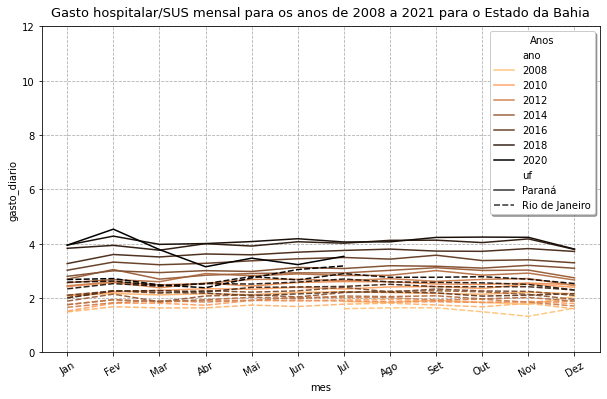

In [100]:
sigla_mes = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=mensal_aberto.query("uf in ('Rio de Janeiro','Paraná')"), x="mes", y="gasto_diario", style='uf', hue="ano",palette='copper_r')
ax.set_title('Gasto hospitalar/SUS mensal para os anos de 2008 a 2021 para o Estado da Bahia', fontsize=13, pad=10)
ax.xaxis.set_major_locator(ticker.FixedLocator(np.arange(1, 13)))
plt.legend(title='Anos', frameon=True, shadow=True, bbox_to_anchor=(1,1))
ax.set_xticklabels(sigla_mes)
plt.xticks(rotation=30)
plt.ylim(0, 12)
plt.grid(linestyle="--")
plt.show()

##**Aula 6**

In [54]:
estado_a_analisar = mensal_aberto.query("uf=='São Paulo'")
estado_a_analisar.head()

,dia_mes_ano,uf,gasto,mes,ano,gasto_diario
0,2008-07-01,São Paulo,194.398399,7,2008,6.270916
1,2008-08-01,São Paulo,184.854516,8,2008,5.963049
2,2008-09-01,São Paulo,188.636360,9,2008,6.287879
3,2008-10-01,São Paulo,179.706467,10,2008,5.796983
4,2008-11-01,São Paulo,167.990353,11,2008,5.599678


In [55]:
gastos_por_ano = estado_a_analisar.groupby("ano").sum()
gastos_por_ano.head()

,gasto,mes,gasto_diario
ano,,,
2008,1107.443413,57,36.107451
2009,2324.349960,69,76.313553
2010,2728.176827,78,89.708588
2011,2888.084693,78,94.995070
2012,2928.498622,78,96.309657


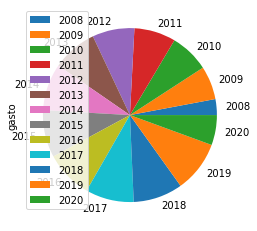

In [56]:
gastos_por_ano.plot(kind = 'pie', y='gasto')

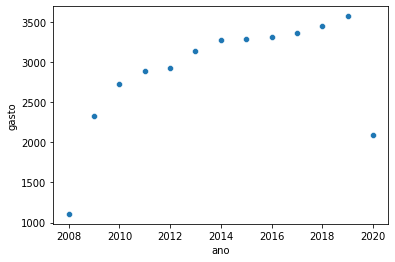

In [57]:
sns.scatterplot(data=gastos_por_ano, x=gastos_por_ano.index, y="gasto")

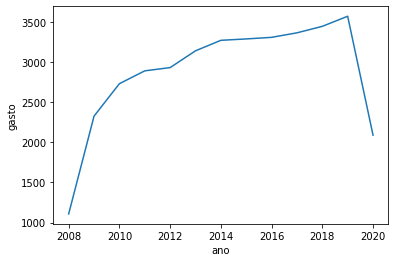

In [58]:
sns.lineplot(data=gastos_por_ano, x=gastos_por_ano.index, y="gasto")

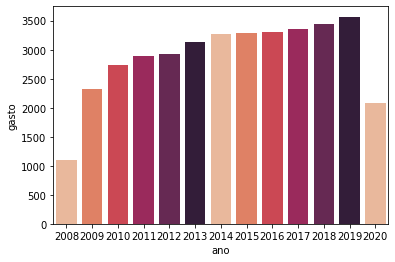

In [59]:
sns.barplot(data=gastos_por_ano, x=gastos_por_ano.index, y="gasto", palette=sns.color_palette("rocket_r"))

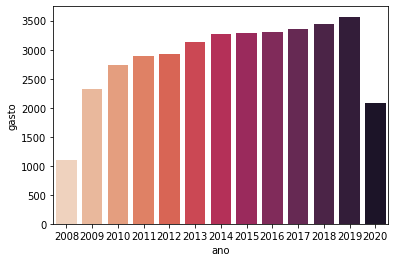

In [60]:
sns.barplot(data=gastos_por_ano, x=gastos_por_ano.index, y="gasto", palette=sns.color_palette("rocket_r", 13))

In [61]:
estados = ["São Paulo", "Minas Gerais", "Pernambuco"]
por_ano_dos_estados = mensal_aberto.query("uf in @estados").groupby(["uf","ano"]).sum().reset_index()
por_ano_dos_estados.head()

,uf,ano,gasto,mes,gasto_diario
0,Minas Gerais,2008,505.491828,57,16.481383
1,Minas Gerais,2009,1063.047336,69,34.916351
2,Minas Gerais,2010,1223.766111,78,40.234780
3,Minas Gerais,2011,1321.731005,78,43.468570
4,Minas Gerais,2012,1402.515081,78,46.105161


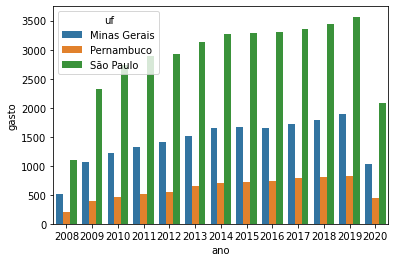

In [62]:
sns.barplot(data=por_ano_dos_estados, x="ano", y="gasto", hue="uf")

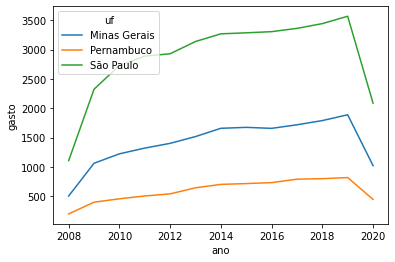

In [63]:
sns.lineplot(data=por_ano_dos_estados, x="ano", y="gasto", hue="uf")

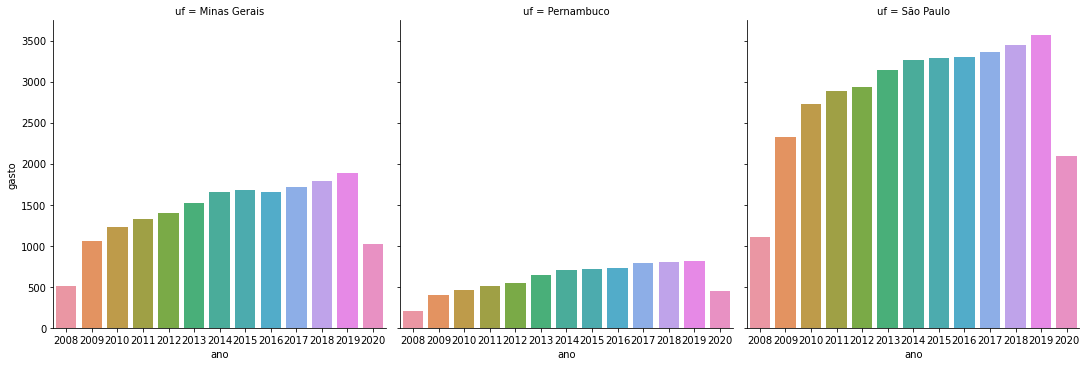

In [64]:
sns.catplot(data=por_ano_dos_estados, y="gasto", x="ano", kind="bar", col="uf")

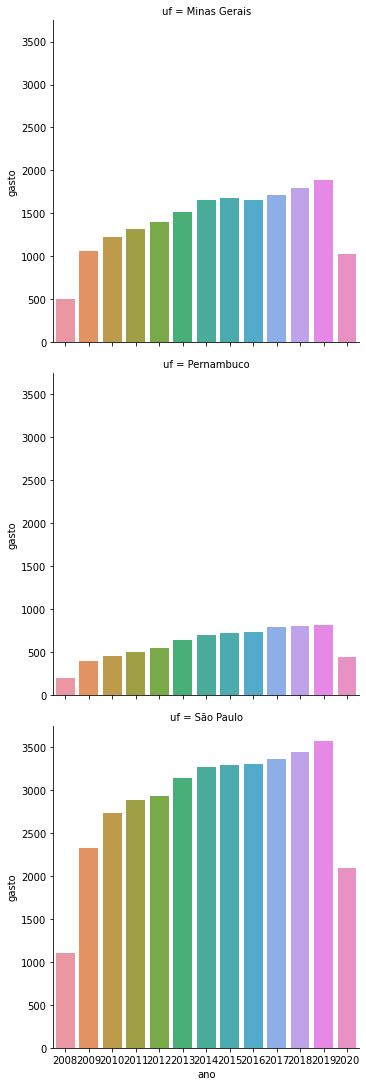

In [65]:
sns.catplot(data=por_ano_dos_estados, y="gasto", x="ano", kind="bar", row="uf")

###**Desafio**

**Desafio 1** - Reordenar as cores pelo valor do eixo y.

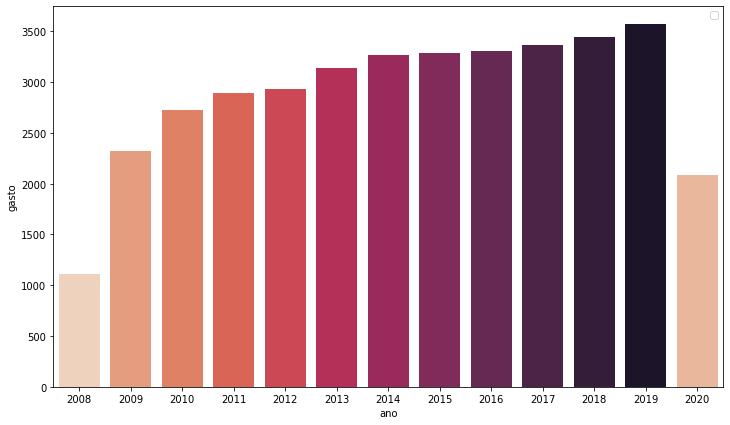

In [112]:
plt.figure(figsize=(12,7))
ax = sns.barplot(data=gastos_por_ano, x=gastos_por_ano.index, y="gasto", hue="gasto", dodge = False, palette=sns.color_palette("rocket_r", 13))
ax.legend('')

**Desafio 2** - Explorar a documentação do Seaborn.

https://seaborn.pydata.org/

**Desafio 3** - Pensar e elaborar novos gráficos depois de estudar o Seaborn, compartilhar com uma breve descrição no Discord, para que outros colegas aprendam sobre o gráfico usado.

<Figure size 1152x576 with 0 Axes>

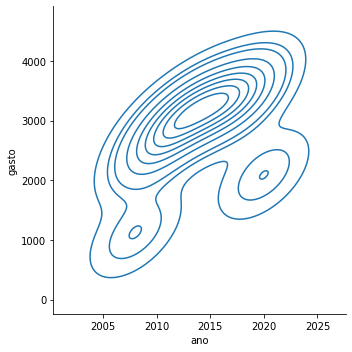

In [114]:
plt.figure(figsize=(16,8))
ax = sns.displot(data=gastos_por_ano, x=gastos_por_ano.index, y="gasto", kind="kde")

<Figure size 1152x576 with 0 Axes>

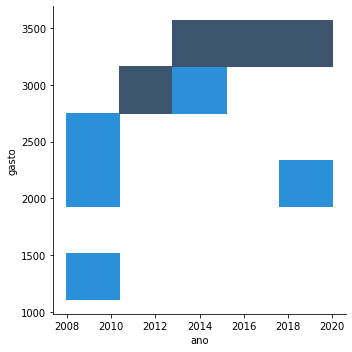

In [115]:
plt.figure(figsize=(16,8))
ax = sns.displot(data=gastos_por_ano, x=gastos_por_ano.index, y="gasto", kind="hist")

**Desafio 4** - Baixe uma outra base de dados do tabnet e execute sua análise de forma similar a aula.